<a href="https://colab.research.google.com/github/Kangin-Lee/ML_Example/blob/main/Rigde%26Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.8 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


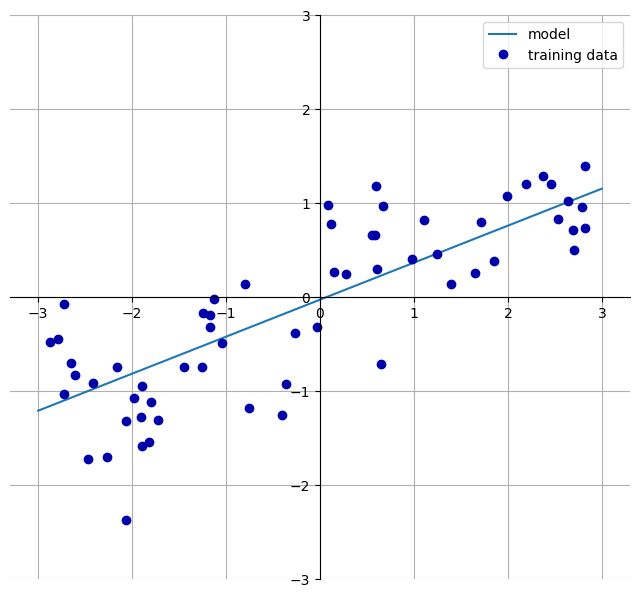

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [7]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test,y_test)))

train set score: 0.67
test set score: 0.66


In [8]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [9]:
print("train set score:{:.2f}".format(lr.score(X_train,y_train)))
print("test set score:{:.2f}".format(lr.score(X_test,y_test)))

train set score:0.95
test set score:0.61


In [ ]:
###RIDGE

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("train set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge.score(X_test,y_test)))

train set score:0.89
test set score:0.75


In [11]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

train set score:0.79
test set score:0.64


In [12]:
ridge01= Ridge(alpha=0.1).fit(X_train, y_train)
print("train set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge01.score(X_test,y_test)))

train set score:0.93
test set score:0.77


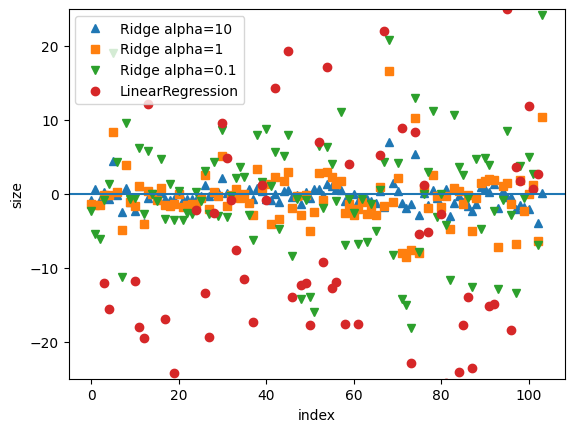

In [13]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("index")
plt.ylabel("size")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

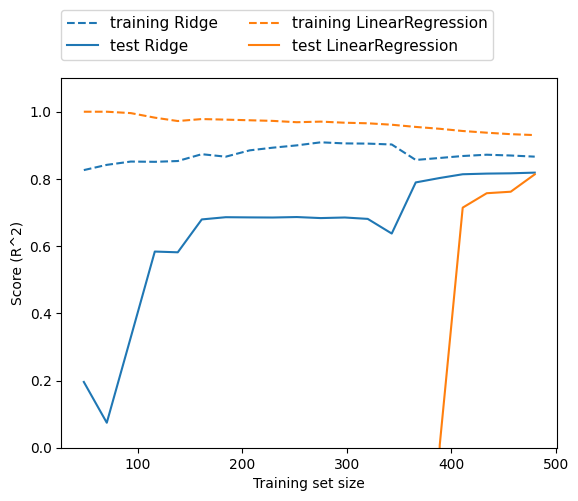

In [14]:
mglearn.plots.plot_ridge_n_samples()

In [ ]:
#Lasso

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("train set score:{:.2f}".format(lasso.score(X_train, y_train)))
print("test set score:{:.2f}".format(lasso.score(X_test, y_test)))
print("use feature sum:", np.sum(lasso.coef_ != 0))

train set score:0.29
test set score:0.21
use feature sum: 4


In [16]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("train set score:{:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score:{:.2f}".format(lasso001.score(X_test, y_test)))
print("use feature sum:", np.sum(lasso001.coef_ != 0))

train set score:0.90
test set score:0.77
use feature sum: 33


In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("train set score:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("use feature sum:", np.sum(lasso00001.coef_ != 0))

train set score:0.95
test set score:0.64
use feature sum: 96


Text(0, 0.5, 'size')

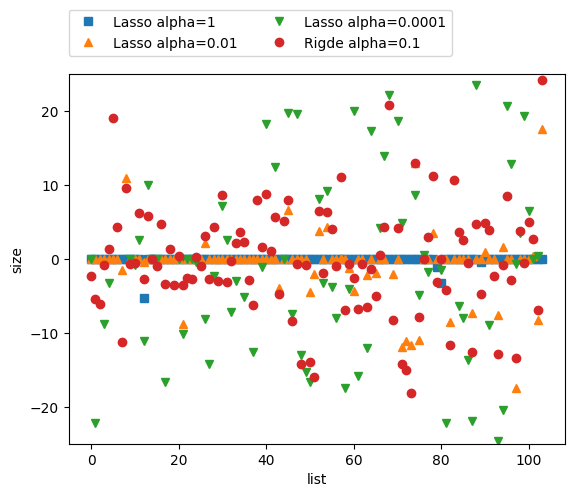

In [18]:
plt.plot(lasso.coef_,"s", label="Lasso alpha=1")
plt.plot(lasso001.coef_,"^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,"v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,"o", label="Rigde alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("list")
plt.ylabel("size")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


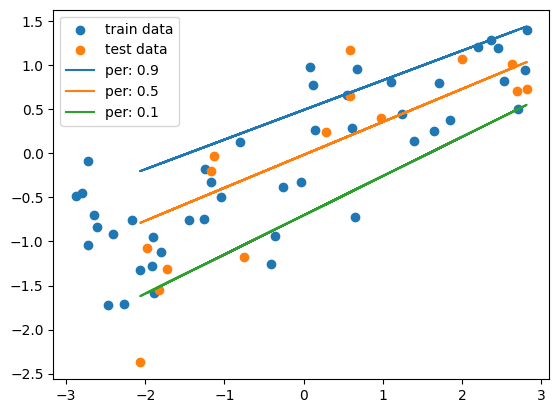

In [22]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# QuantileRegressor 사용하여 예측
pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train).predict(X_test)

# 시각화
plt.scatter(X_train, y_train, label="train data")
plt.scatter(X_test, y_test, label="test data")
plt.plot(X_test, pred_up, label="per: 0.9")
plt.plot(X_test, pred_med, label="per: 0.5")
plt.plot(X_test, pred_low, label="per: 0.1")
plt.legend()
plt.show()